Only mountains virtual images are loaded in a drive folder

In [ ]:
# we transer them in the virtual env
SOURCE_IMAGES_DIR= '/content/drive/MyDrive/virtualonlymountains'
UNZIP_PATH = '/content/data_extracted'


DEST_IMAGES_DIR = os.path.join(UNZIP_PATH, 'virtualonlymountains')


if os.path.exists(SOURCE_IMAGES_DIR):
    print("\n2. Copia dati virtuali aggiuntivi (Montagna) ")

    # taregt folder must exist
    os.makedirs(DEST_IMAGES_DIR, exist_ok=True)


    # copying data to dest folder
    !cp -R "{SOURCE_IMAGES_DIR}/"* "{DEST_IMAGES_DIR}"


    print(f"Copia completata. Dati montagna disponibili in: {DEST_IMAGES_DIR}")
else:
    print(f"\nAVVISO: Cartella virtualonlymountains non trovata in {SOURCE_IMAGES_DIR}")

print("\nTutte le operazioni sui dati sono complete.")



2. Copia dati virtuali aggiuntivi (Montagna) in corso...
Copia completata. Dati montagna disponibili in: /content/data_extracted/virtualonlymountains

Tutte le operazioni sui dati sono complete.


In [ ]:
# Verifying all images are loaded

DEST_IMAGES_DIR = '/content/data_extracted/virtualonlymountains'

print(f"Ispezione della directory: {DEST_IMAGES_DIR}")

# Elenca i primi 10 file per confermare che i dati siano presenti
print("\nPrimi 10 file copiati:")
!ls {DEST_IMAGES_DIR} | head -n 10

# Conta il numero totale di file (per assicurarsi che siano tutti stati copiati)
print("\nConteggio totale delle immagini:")
!ls {DEST_IMAGES_DIR} | wc -l


Ispezione della directory: /content/data_extracted/virtualonlymountains

Primi 10 file copiati:
scene01_000000.jpg
scene01_000001.jpg
scene01_000002.jpg
scene01_000003.jpg
scene01_000004.jpg
scene01_000005.jpg
scene01_000006.jpg
scene01_000007.jpg
scene01_000008.jpg
scene01_000009.jpg

Conteggio totale delle immagini:
1662


Zip file with train real and virtual ( only mountains ) is loaded

In [ ]:
from google.colab import drive
import os

# 1. Monta Google Drive
drive.mount('/content/drive')

# Definisci il percorso del tuo file ZIP su Drive
# DEVI SOSTITUIRE 'My Drive' e 'Drone_Project_Data' con i nomi esatti delle tue cartelle
ZIP_PATH_ON_DRIVE = '/content/drive/MyDrive/zip_data_cv.zip'

# Definisci la directory dove i dati verranno decompressi (nella memoria temporanea di Colab)
UNZIP_PATH = '/content/data_extracted'

if not os.path.exists(UNZIP_PATH):
    os.makedirs(UNZIP_PATH)

print(f"Percorso del file ZIP su Drive: {ZIP_PATH_ON_DRIVE}")
print(f"Percorso di destinazione per la decompressione: {UNZIP_PATH}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Percorso del file ZIP su Drive: /content/drive/MyDrive/zip_data_cv.zip
Percorso di destinazione per la decompressione: /content/data_extracted


In [ ]:
import shutil

# Esegui il comando di decompressione
# -q: modalità silenziosa
# -o: sovrascrivi file esistenti senza chiedere
# -d: directory di destinazione
print("Avvio decompressione. Attendere...")

# Rimuovi la cartella precedente (se esiste) per una pulizia completa
if os.path.exists(os.path.join(UNZIP_PATH, 'real_LRDD')):
    shutil.rmtree(os.path.join(UNZIP_PATH, 'real_LRDD'))

# Esegui la decompressione
!unzip -q -o {ZIP_PATH_ON_DRIVE} -d {UNZIP_PATH}

print("Decompressione completata con successo!")
# Verifica rapida della struttura
!ls {UNZIP_PATH}/real_LRDD/train/images | head -n 3


Avvio decompressione. Attendere...
Decompressione completata con successo!
DRONE_001_1005.jpg
DRONE_001_1014.jpg
DRONE_001_1018.jpg


Verifying new path


In [ ]:
BASE_DATA_PATH = UNZIP_PATH

virt_img_dir = f"{BASE_DATA_PATH}/virtual/train/images"
virt_lbl_dir = f"{BASE_DATA_PATH}/virtual/train/labels"
real_img_dir = f"{BASE_DATA_PATH}/real_LRDD/train/images"
real_lbl_dir = f"{BASE_DATA_PATH}/real_LRDD/train/labels"


# Verify paths (sanity check)
print(f"Verified Source Images: {virt_img_dir}")
print(f"Verified Target Images: {real_img_dir}")


Verified Source Images: /content/data_extracted/virtual/train/images
Verified Target Images: /content/data_extracted/real_LRDD/train/images


Verifying the presence of all datasets

In [ ]:
def check_dataset_presence(base_path):
    """Controlla se le cartelle chiave esistono e quanti file contengono."""

    # Percorsi delle cartelle chiave (basati sulla sua configurazione)
    paths_to_check = {
        "Source (Virtual) Images": os.path.join(base_path, 'virtual/train/images'),
        "Source (Virtual) Labels": os.path.join(base_path, 'virtual/train/labels'),
        "Target (Real) Images": os.path.join(base_path, 'real_LRDD/train/images'),
        "Target (Real) Labels": os.path.join(base_path, 'real_LRDD/train/labels'),
        "Virtual Mountains Images (Added)": os.path.join(base_path, 'virtualmountains/train/images'),
    }

    print("\n--- RISULTATO DELLA VERIFICA DEI DATI ESTRATTI ---")

    all_ok = True
    for name, path in paths_to_check.items():
        if os.path.isdir(path):
            count = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
            print(f" {name}: Trovato ({count} file)")
        else:
            print(f"{name}: NON TROVATO (Percorso mancante: {path})")
            all_ok = False

    if all_ok:
        print("\nSETUP DATI CONFERMATO: Tutte le directory chiave contengono file.")
    else:
        print("\nSETUP DATI FALLITO: Rivedere la struttura del file ZIP principale.")

# ESECUZIONE DELLA VERIFICA
# In Colab, le variabili definite nelle celle precedenti sono globali.
check_dataset_presence(UNZIP_PATH)

**Function set up**

In [ ]:
# installing torchvision
#!pip install torchvision

Function definition, inspired by Domain Adaptive Faster R-CNN for Object Detection in the Wild" (Chen et al., 2018)


In [ ]:
import os
from glob import glob
from typing import List, Dict, Tuple
import itertools
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
from torch.utils.data import Dataset, DataLoader
import torch.nn.utils as utils # For gradient clipping

import torchvision
from torchvision.models.detection import (
    fasterrcnn_resnet50_fpn,
    FasterRCNN_ResNet50_FPN_Weights
)
from torchvision.models.detection.rpn import AnchorGenerator
import torchvision.transforms.functional as TF
from PIL import Image

In [ ]:
class GradientReverseFn(autograd.Function):
    """Handles the forward (identity) and backward (gradient reversal) pass."""
    @staticmethod
    def forward(ctx, x, lambda_):
        # Save the dynamic lambda for the backward pass. This parameter
        # controls the strength of the domain adaptation loss.
        ctx.lambda_ = lambda_
        # Forward pass is just an identity function: output = input
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        #  Reverse and scale the gradient.
        # This makes the feature extractor (backbone) learn domain-invariant features,
        # as it tries to *maximize* the domain classification loss.
        return -ctx.lambda_ * grad_output, None # The 'None' handles the gradient for lambda_

#A standard PyTorch Module wrapper for the GRL Function.
# This makes it easy to integrate into the model's forward method.
class GradientReverse(nn.Module):
    """Module wrapper for GRL, accepts lambda in forward for dynamic scheduling."""
    def __init__(self):
        super().__init__()

    def forward(self, x, lambda_):
        # Pass the dynamically calculated lambda_ directly to the function
        return GradientReverseFn.apply(x, lambda_)

# ==============================================================================
# DA-FASTER R-CNN MODEL FOR GLOBAL IMAGE-LEVEL DOMAIN ADAPTATION
# Architecture inspired by: "Domain Adaptive Faster R-CNN for Object Detection in the Wild" (Chen et al., 2018)

class DAFasterRCNN_Global_Stable(nn.Module):
    """
    Domain-Adaptive Faster R-CNN with COCO pre-trained weights initialization
    for a stable Task Loss. This version includes image-level domain adaptation.
    """
    def __init__(self, num_classes, lambda_da_max=1.0, da_warmup_steps=4000):
        super().__init__()
        # Hyperparameters for the Domain Adaptation (DA) component
        self.lambda_da_max = lambda_da_max
        self.da_warmup_steps = da_warmup_steps
        self.current_step = 0 # To track training progress for the warm-up schedule

        # --- 1. BASE DETECTOR CONFIGURATION (Faster R-CNN) ---

        # Load COCO weights to pre-train the feature extractor (backbone)
        weights = FasterRCNN_ResNet50_FPN_Weights.COCO_V1

        # Custom anchors for drone detection (or small objects)
        # Using smaller sizes is crucial for detecting objects like drones.
        anchor_generator = AnchorGenerator(
            sizes=((8, 16, 32), (16, 32, 64), (32, 64, 128), (64, 128, 256), (128, 256, 512)),
            aspect_ratios=((0.5, 1.0, 2.0),) * 5
        )

        # MANUAL BACKBONE WEIGHT LOADING TO AVOID RPN/BOX HEAD SIZE MISMATCH ---

        # 1. Initialize the detector with the correct configuration (custom anchors, N classes)
        # We start without weights because the RPN/Box Head dimensions are different from COCO's
        self.detector = fasterrcnn_resnet50_fpn(
            weights=None,
            num_classes=num_classes, # E.g., background + drone (2 classes)
            rpn_anchor_generator=anchor_generator
        )

        # 2. Create a temporary model only to fetch the pre-trained COCO weights
        coco_model = fasterrcnn_resnet50_fpn(weights=weights)

        # 3. Copy ONLY the backbone's weights from the COCO model to our model.
        # This keeps the feature extraction strong while allowing the RPN and Box Heads
        # to correctly initialize for our custom anchor sizes and number of classes.
        self.detector.backbone.load_state_dict(coco_model.backbone.state_dict())

        # The final layers (RPN Head and Box Predictor) maintain their default initialization
        # (usually random) and the correct dimensions.

        # --- 2. DOMAIN ADAPTATION (DA) CONFIGURATION ---
        self.grl = GradientReverse()
        self.im_domain_head = None # Will be lazily initialized based on feature size

    def set_current_step(self, step):
        """Allows external update of the current iteration/step count."""
        self.current_step = step

    def warmup_lambda(self):
        """Gradually increase lambda_da over first steps (linear schedule)."""
        # A common technique to stabilize early-stage training: the DA loss
        # is gradually introduced to allow the detector to learn basic features first.
        if self.current_step >= self.da_warmup_steps:
            return self.lambda_da_max

        progress = self.current_step / self.da_warmup_steps
        return progress * self.lambda_da_max

    def _build_domain_head(self, feature_dict):
        """Initializes the domain classifier based on the feature dimensions."""
        num_scales = len(feature_dict) # Number of FPN levels (usually 5)
        # Assuming FPN gives 256-dim features (p2, p3, p4, p5, p6)
        feat_dim = next(iter(feature_dict.values())).shape[1]
        input_dim = num_scales * feat_dim # Total size after concatenation

        # Domain Classifier Head: simple MLP for binary classification (Source vs. Target)
        self.im_domain_head = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 2) # Output: Logits for Source (0) and Target (1)
        ).to(next(self.parameters()).device)

    def forward(self, images, targets=None, domain=None):
        if self.training and domain is None:
            raise ValueError("Need domain='source' or 'target' during training.")

        # Inference mode: standard Faster R-CNN forward pass
        if not self.training:
            self.detector.eval()
            with torch.no_grad():
                return self.detector(images)

        # --- TRAINING MODE ---

        # 1. Feature Extraction (Backbone + FPN)
        images_t, targets_t = self.detector.transform(images, targets)
        features = self.detector.backbone(images_t.tensors)
        # Ensure features are a dictionary for FPN (handle single-tensor case)
        if isinstance(features, torch.Tensor):
            features = OrderedDict([("0", features)])

        # 2. Lazy initialization: Build Domain Head if it hasn't been done yet
        if self.im_domain_head is None:
            self._build_domain_head(features)

        det_losses = {}
        # 3. DETECTION TASK LOSS (Only calculated on labeled SOURCE data)
        if domain == "source":
            # Call the standard Faster R-CNN forward to get RPN and Box losses
            det_outputs = self.detector.forward(images, targets)
            det_losses.update(det_outputs)

        # 4. DOMAIN ADAPTATION LOSS (Applied to both Source and Target)
        da_losses = {}

        # Domain label (0=source, 1=target) for the Cross-Entropy loss
        dom_label = 0 if domain == "source" else 1
        dom_label_tensor = torch.full(
            (len(images),), dom_label, dtype=torch.long, device=images[0].device
        )

        # Global pooled features: Aggregate features from all FPN levels (P2-P5)
        pooled = [
            # Global Average Pooling (GAP) on each feature map to get a fixed-size vector
            F.adaptive_avg_pool2d(f, 1).flatten(1)
            for f in features.values()
        ]
        im_feat = torch.cat(pooled, dim=1) # Concatenate the features: [Batch, Total_Feature_Dim]

        # 5. GRL with dynamic warm-up
        lambda_da = self.warmup_lambda()
        # Apply GRL: gradient is reversed and scaled by lambda_da.
        # This makes the backbone learn domain-invariant features.
        rev_feat = self.grl(im_feat, lambda_da)

        # Classify the domain based on the reversed features
        logits = self.im_domain_head(rev_feat)
        # Calculate DA loss (Cross-Entropy)
        da_losses["loss_da_im"] = F.cross_entropy(logits, dom_label_tensor)

        # 6. Combine all losses (Detection Loss + Domain Adaptation Loss)
        losses = {}
        losses.update(det_losses)
        losses.update(da_losses)
        return losses

Dataloader

In [ ]:
class YoloTxtDetectionDataset(Dataset):
    """Loads images and converts YOLO format labels (normalized cx,cy,w,h)
    to TorchVision format (absolute x1,y1,x2,y2)."""
    def __init__(self, img_dir: str, label_dir: str, transforms=None):
        self.img_paths = sorted(
            [p for p in glob(os.path.join(img_dir, "*")) if p.lower().endswith((".jpg", ".png", ".jpeg"))]
        )
        self.label_dir = label_dir
        self.transforms = transforms

    def __len__(self):
        return len(self.img_paths)

    def _load_yolo_labels(self, img_path: str, w: int, h: int):
        base = os.path.splitext(os.path.basename(img_path))[0]
        label_path = os.path.join(self.label_dir, base + ".txt")

        boxes = []
        labels = []

        if not os.path.exists(label_path):
            # Crucial: return empty tensors if no labels found
            return torch.empty((0, 4), dtype=torch.float32), torch.empty((0,), dtype=torch.int64)

        with open(label_path, "r") as f:
            for line in f.readlines():
                line = line.strip()
                if not line: continue
                parts = line.split()
                # YOLO format: class_id cx cy w h (normalized to 0-1)
                cls = int(parts[0])
                x_c, y_c, bw, bh = map(float, parts[1:5])

                # Convert normalized cx, cy, w, h → absolute pixel xyxy
                x_c, y_c, bw, bh = x_c * w, y_c * h, bw * w, bh * h
                x1 = x_c - bw / 2
                y1 = y_c - bh / 2
                x2 = x_c + bw / 2
                y2 = y_c + bh / 2

                boxes.append([x1, y1, x2, y2])
                # IMPORTANT: Faster R-CNN reserves class ID 0 for background.
                # If YOLO is 0-indexed, shift classes by 1.
                labels.append(cls + 1)

        if boxes:
            boxes = torch.tensor(boxes, dtype=torch.float32)
            labels = torch.tensor(labels, dtype=torch.int64)
        else:
            boxes = torch.empty((0, 4), dtype=torch.float32)
            labels = torch.empty((0,), dtype=torch.int64)

        return boxes, labels

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        boxes, labels = self._load_yolo_labels(img_path, w, h)

        target = {
            "boxes": boxes,
            "labels": labels,
            "image_id": torch.tensor([idx]),
            # Required for TorchVision: area and iscrowd
            "area": (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1]) if boxes.numel() > 0 else torch.tensor([], dtype=torch.float32),
            "iscrowd": torch.zeros((boxes.shape[0],), dtype=torch.int64),
        }

        if self.transforms:
            img, target = self.transforms(img, target)

        # Convert PIL Image to Tensor
        img = TF.to_tensor(img)
        return img, target

def det_collate(batch):
    """Custom collate function required by TorchVision detection models."""
    imgs, targets = zip(*batch)
    return list(imgs), list(targets)

Function of the model

In [ ]:
def train_da_stable(
    model,
    source_loader,
    target_loader,
    optimizer,
    num_epochs=15,
    da_weight=0.001,
    device="cuda"
):
    model.train()
    # Cycle the target loader so it runs as long as the source loader
    target_iter = itertools.cycle(target_loader)
    global_step = 0

    # Initialize total_loss outside the loop for safe use in checkpointing on epoch 0
    total_loss = torch.tensor(0.0, device=device)

    print(f"Starting training on device: {device}")
    print(f"Total batches per epoch: {len(source_loader)}")

    for epoch in range(num_epochs):

        # -----------------------------------------------
        # 1. BATCH LOOP (INNER LOOP)
        # -----------------------------------------------
        for i, (src_imgs, src_tgts) in enumerate(source_loader):

            # Update step and lambda schedule
            global_step += 1
            model.set_current_step(global_step)

            src_imgs = [img.to(device) for img in src_imgs]
            src_tgts = [{k: v.to(device) for k, v in t.items()} for t in src_tgts]

            # SOURCE FORWARD PASS (Task Loss + DA Loss)
            src_loss_dict = model(src_imgs, src_tgts, domain="source")

            # Aggregate detection task losses
            det_loss = (
                src_loss_dict.get("loss_classifier", torch.tensor(0.0, device=device)) +
                src_loss_dict.get("loss_box_reg", torch.tensor(0.0, device=device)) +
                src_loss_dict.get("loss_objectness", torch.tensor(0.0, device=device)) +
                src_loss_dict.get("loss_rpn_box_reg", torch.tensor(0.0, device=device))
            )
            da_src = src_loss_dict.get("loss_da_im", torch.tensor(0.0, device=device))

            #  TARGET FORWARD PASS (DA Loss ONLY)
            tgt_imgs, _ = next(target_iter)
            tgt_imgs = [img.to(device) for img in tgt_imgs]

            tgt_loss_dict = model(tgt_imgs, targets=None, domain="target")
            da_tgt = tgt_loss_dict.get("loss_da_im", torch.tensor(0.0, device=device))

            #  TOTAL LOSS & OPTIMIZATION
            # Total Loss = Task Loss + DA Weight * (DA Source Loss + DA Target Loss)
            total_loss = det_loss + da_weight * (da_src + da_tgt)

            optimizer.zero_grad()
            total_loss.backward()

            # Gradient clipping for adversarial stability (CRITICAL)
            utils.clip_grad_norm_(model.parameters(), max_norm=5.0)

            optimizer.step()

            # LOGGING
            if global_step % 10 == 0:
                current_lambda = model.warmup_lambda()
                print(
                    f"[Epoch {epoch} Step {global_step}] "
                    f"det={det_loss.item():.4f} "
                    f"DA_src={da_src.item():.4f} "
                    f"DA_tgt={da_tgt.item():.4f} "
                    f"lambda={current_lambda:.6f} "
                    f"total={total_loss.item():.4f}"
                )

        # -----------------------------------------------
        # 2. CHECKPOINT SAVING (Runs once per epoch)
        # -----------------------------------------------
        save_path = f"da_frcnn_epoch_{epoch}.pth"
        torch.save({
            'epoch': epoch,
            'global_step': global_step,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': total_loss.item(), # Last calculated loss of this epoch
        }, save_path)
        print(f"\nModel checkpoint saved to {save_path}\n")

    print("Training complete.")

Running it

In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.utils as utils # For gradient clipping

# NOTE: The train_da_stable function must be defined in the cell above (Section 3/4)

# --- HYPERPARAMETERS ---
num_classes = 2          # Background (0) + Drone Class (1)
lambda_da_max = 0.0
da_warmup_steps = 2000
da_weight = 0.00005 #decreased from 0.0001
num_epochs = 30
batch_size = 2           # Use this small size for stability/memory
num_workers = 2




#  DEVICE & SETUP
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using GPU: {torch.cuda.get_device_name(0)}")

#  DATA LOADERS
source_dataset = YoloTxtDetectionDataset(virt_img_dir, virt_lbl_dir)
target_dataset = YoloTxtDetectionDataset(real_img_dir, real_lbl_dir)

source_loader = DataLoader(
    source_dataset, batch_size=batch_size, shuffle=True, collate_fn=det_collate, num_workers=num_workers
)
target_loader = DataLoader(
    target_dataset, batch_size=batch_size, shuffle=True, collate_fn=det_collate, num_workers=num_workers
)

# MODEL & OPTIMIZER
model = DAFasterRCNN_Global_Stable(
    num_classes=num_classes,
    lambda_da_max=lambda_da_max,
    da_warmup_steps=da_warmup_steps
).to(device)

optimizer = optim.SGD(
    model.parameters(),
    lr=0.001,
    momentum=0.9,
    weight_decay=0.0005
)

#  LAUNCH TRAINING

# CRITICAL: We modify the training function here to save directly to Google Drive
# NOTE: This assumes the full train_da_stable function is available from Section 4 of your original script.

def train_da_stable(
    model, source_loader, target_loader, optimizer, num_epochs=10, da_weight=0.001, device="cuda"
):
    model.train()
    target_iter = itertools.cycle(target_loader)
    global_step = 0
    total_loss = torch.tensor(0.0, device=device)

    # Define the save directory on Google Drive
    DRIVE_SAVE_DIR = os.path.join(BASE_DRIVE_PATH, "Checkpoints")
    os.makedirs(DRIVE_SAVE_DIR, exist_ok=True) # Ensure directory exists

    #  (Rest of the train_da_stable logic runs as defined in your final script) ...
    #
    # PASTE THE FULL train_da_stable FUNCTION LOGIC HERE
    #  REMEMBER TO MODIFY THE CHECKPOINT SAVE PATH!

    # Example modified saving logic:
    for epoch in range(num_epochs):
        # ... (INNER BATCH LOOP CODE) ...
        for i, (src_imgs, src_tgts) in enumerate(source_loader):
            # ... (all the forward/backward/optimization logic) ...

            # --- LOGGING (Important for Colab, as Colab sessions can be monitored) ---
            if global_step % 100 == 0: # Log less frequently for large jobs
                # ... print logs ...
                pass

        # 2. CHECKPOINT SAVING (Saves directly to Google Drive)
        save_path = os.path.join(DRIVE_SAVE_DIR, f"da_frcnn_epoch_{epoch}.pth")
        torch.save({
            'epoch': epoch,
            'global_step': global_step,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': total_loss.item(),
        }, save_path)
        print(f"\nModel checkpoint saved to Google Drive at {save_path}\n")

    print("Training complete.")


# Launch the training function (make sure the full function body is defined in this cell)


Using GPU: Tesla T4
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 148MB/s]


Cell to verify the loss has been saved

In [ ]:

# checkpoint path
CHECKPOINT_PATH = '/content/drive/MyDrive/Checkpoints/da_frcnn_epoch_1.pth'
device = torch.device("cuda")

try:
    checkpoint = torch.load(CHECKPOINT_PATH, map_location=device)

    saved_loss = checkpoint.get('loss', 'N/A')

    print("--- Analisi Checkpoint Epoca 0 ---")
    print(f"Epoca salvata: {checkpoint.get('epoch')}")
    print(f"Global Step salvato: {checkpoint.get('global_step')}")
    print(f"Loss Totale Registrata (Ultimo Batch): {saved_loss:.4f}")

    if saved_loss > 1.0:
        print("➡️ LA DET LOSS E' ANCORA ALTA: Il modello non ha imparato molto o la Task Loss è rimasta dominante.")
    else:
        print("✅ LA DET LOSS E' SCESA: Il modello ha iniziato ad imparare. Procedi con il test di 5 epoche.")

except Exception as e:
    print(f"ERRORE nel caricamento del checkpoint: {e}")

--- Analisi Checkpoint Epoca 0 ---
Epoca salvata: 1
Global Step salvato: 0
Loss Totale Registrata (Ultimo Batch): 0.0000
✅ LA DET LOSS E' SCESA: Il modello ha iniziato ad imparare. Procedi con il test di 5 epoche.


In [ ]:
# Path Configuration

BASE_DRIVE_PATH = '/content/drive/MyDrive/'

# L'output (checkpoint) verrà salvato qui: /content/drive/MyDrive/Drone_Project_Data/Checkpoints
DRIVE_SAVE_DIR = os.path.join(BASE_DRIVE_PATH, "Checkpoints")
os.makedirs(DRIVE_SAVE_DIR, exist_ok=True)


if not os.path.isdir(virt_img_dir):
    raise FileNotFoundError(f"Il percorso delle immagini virtuali non è stato trovato: {virt_img_dir}")

print(f"I checkpoint verranno salvati in: {DRIVE_SAVE_DIR}")


I checkpoint verranno salvati in: /content/drive/MyDrive/Checkpoints


In [ ]:


train_da_stable(model, source_loader, target_loader, optimizer, num_epochs=num_epochs, da_weight=da_weight, device=device)


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_0.pth


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_1.pth


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_2.pth


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_3.pth


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_4.pth


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_5.pth


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_6.pth


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_7.pth


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_8.pth


Model checkpoint saved to Google Drive at /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_9.pth



Valuation


In [ ]:
# Cella Colab per il Caricamento del Modello

import torch
import os
# Importa la classe DAFasterRCNN_Global_Stable (deve essere definita in una cella precedente)

# --- CONFIGURAZIONE ---
CHECKPOINT_FILENAME = 'da_frcnn_epoch_29.pth'
DRIVE_SAVE_DIR = '/content/drive/MyDrive/Checkpoints' # DEVE corrispondere al percorso di salvataggio
FINAL_CHECKPOINT_PATH = os.path.join(DRIVE_SAVE_DIR, CHECKPOINT_FILENAME)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 2 # Background + 1 classe Drone

# 1. Inizializza il modello (lo scheletro)
model = DAFasterRCNN_Global_Stable(
    num_classes=num_classes,
    # Questi parametri non sono usati in inferenza, ma sono necessari per l'inizializzazione
    lambda_da_max=1.0,
    da_warmup_steps=1000
).to(device)

# 2. Carica lo stato del checkpoint
print(f"Caricamento pesi da: {FINAL_CHECKPOINT_PATH}")
checkpoint = torch.load(FINAL_CHECKPOINT_PATH, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])

# 3. Imposta la modalità di valutazione
model.eval()

print("Modello caricato e impostato in modalità di valutazione (model.eval()). Pronto per il test.")

Caricamento pesi da: /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_29.pth
Modello caricato e impostato in modalità di valutazione (model.eval()). Pronto per il test.


Tets dataset

In [ ]:
# Cella Colab per il Caricamento Dati di Test




TEST_IMG_DIR = f"{BASE_DATA_PATH}//real_LRDD/test/images"
TEST_LBL_DIR = f"{BASE_DATA_PATH}//real_LRDD/test/labels"

# Crea il dataset di test (riutilizzando la classe YoloTxtDetectionDataset)
test_dataset = YoloTxtDetectionDataset(TEST_IMG_DIR, TEST_LBL_DIR)

test_loader = DataLoader(
    test_dataset, batch_size=4, shuffle=False, collate_fn=det_collate, num_workers=2
)
print(f"Set di test caricato. Totale immagini: {len(test_dataset)}")

Set di test caricato. Totale immagini: 1734


**Evaluation on confidence and number of predicted boxes**

Installation

In [ ]:
# Cella 1: Installazione delle dipendenze corrette

print("Installing compatible torch and torchvision versions...")
# Installazione di torch 2.2.2 e torchvision 0.17.2, una combinazione stabile.
#!pip install torch==2.2.2 torchvision==0.17.2 --extra-index-url https://download.pytorch.org/whl/cu121

# Installazione delle utility di valutazione (pycocotools)
#!pip install cython pycocotools

# Clonazione e copia dei file ausiliari mancanti
#!git clone https://github.com/pytorch/vision.git
#!cp vision/references/detection/utils.py .
#!cp vision/references/detection/coco_utils.py .

print("Installazione completa. SI PREGA DI RIAVVIARE IL RUNTIME ORA.")

In [ ]:
# FIX: Downgrade NumPy to a compatible version
# NumPy 2.0.2 can cause RuntimeErrors with some PyTorch/Torchvision installations.
print("Uninstalling current NumPy and installing compatible version...")
#!pip uninstall -y numpy
#!pip install numpy==1.26.4
print("NumPy installation complete. Please RESTART RUNTIME (Runtime -> Restart runtime) before proceeding.")

In [ ]:
num_classes = 2 # Background (0) + Drone Class (1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# DAFasterRCNN_Global_Stable needs to be re-defined or imported if runtime was restarted
# For this fix, I'll assume the model definition cell (IfD71-xMav5I) was re-executed.

# Re-create model instance and load state dict
model = DAFasterRCNN_Global_Stable( # FIX: Corrected typo in class name
    num_classes=num_classes,
    lambda_da_max=1, # These parameters are needed for instantiation
    da_warmup_steps=1000 # but not used in inference mode
).to(device)

CHECKPOINT_FILENAME = 'da_frcnn_epoch_29.pth'
DRIVE_SAVE_DIR = '/content/drive/MyDrive/Checkpoints'
FINAL_CHECKPOINT_PATH = os.path.join(DRIVE_SAVE_DIR, CHECKPOINT_FILENAME)

print(f"Caricamento pesi da: {FINAL_CHECKPOINT_PATH}")
checkpoint = torch.load(FINAL_CHECKPOINT_PATH, map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# Re-create test dataset and loader
TEST_IMG_DIR = '/content/data_extracted/real_LRDD/test/images'
TEST_LBL_DIR = '/content/data_extracted/real_LRDD/test/labels'



# Re-crea dataset e loader
test_dataset = YoloTxtDetectionDataset(TEST_IMG_DIR, TEST_LBL_DIR)

SUBSET_SIZE = 20 #
subset_indices = list(range(SUBSET_SIZE))
test_dataset_subset = torch.utils.data.Subset(test_dataset, subset_indices)
print(f"Set di test limitato a {SUBSET_SIZE} immagini per la verifica gratuita.")
# *******************************************************************

# Usiamo il Batch Size 1 (o 2) e num_workers=0 per massima stabilità
test_loader = DataLoader(
    test_dataset_subset, batch_size=2, shuffle=False, num_workers=0, collate_fn=det_collate
)



from tqdm.notebook import tqdm
import torch
import torch.nn.functional as F


# Calcoliamo la Confidence Media e il numero totale di box predetti.

def run_simple_test(model, data_loader, device):
    model.eval()
    total_detections = 0
    total_confidence = 0.0

    # Questo ciclo serve solo per verificare che il modello generi output validi
    for images, targets in tqdm(data_loader, desc="Esecuzione Inferenza Veloce"):
        images = list(img.to(device) for img in images)

        with torch.no_grad():
            outputs = model(images)

        for output in outputs:
            # outputs è una lista di dizionari, uno per immagine
            scores = output['scores']

            if len(scores) > 0:
                total_detections += len(scores)
                total_confidence += scores.mean().item()

    if total_detections == 0:
        print("\n[RISULTATO V.0] NESSUN DRONE RILEVATO. Il modello è probabilmente inefficiente o ha threshold troppo alti.")
        return

    avg_confidence = total_confidence / total_detections

    print("\n--- RISULTATO TEST VELOCE (Solo Sanità) ---")
    print(f"Immagini Processate: {len(data_loader.dataset)}")
    print(f"Totale Bounding Box Predette: {total_detections}")
    print(f"Confidenza Media delle Predizioni: {avg_confidence:.4f}")

    if avg_confidence > 0.7:
        print("✅ SUCCESS: Il modello genera output ad alta confidenza. Vale la pena acquistare i crediti Premium per la valutazione mAP completa.")
    else:
        print("⚠️ AVVISO: La confidenza è bassa. Il modello potrebbe non aver imparato bene o ha bisogno di più epoche.")

Caricamento pesi da: /content/drive/MyDrive/Checkpoints/da_frcnn_epoch_29.pth
Set di test limitato a 20 immagini per la verifica gratuita.


In [ ]:
run_simple_test(model, test_loader, device)

Esecuzione Inferenza Veloce:   0%|          | 0/10 [00:00<?, ?it/s]


--- RISULTATO TEST VELOCE (Solo Sanità) ---
Immagini Processate: 20
Totale Bounding Box Predette: 2000
Confidenza Media delle Predizioni: 0.0053
⚠️ AVVISO: La confidenza è bassa. Il modello potrebbe non aver imparato bene o ha bisogno di più epoche.


**t-SNE**

In [ ]:
/content/data_extracted/virtualonlymountains



2. Copia dati virtuali aggiuntivi (Montagna) in corso...
Copia completata. Dati montagna disponibili in: /content/data_extracted/virtualonlymountains

Tutte le operazioni sui dati sono complete.


t-SNE before city images, change with mixed dataframe when willing to see the difference

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:01<00:00, 150MB/s]


Inizio estrazione feature Sorgente...


Extracting Features:   0%|          | 0/1000 [00:00<?, ?it/s]

Inizio estrazione feature Target...


Extracting Features:   0%|          | 0/1000 [00:00<?, ?it/s]

Esecuzione T-SNE su 2000 campioni...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


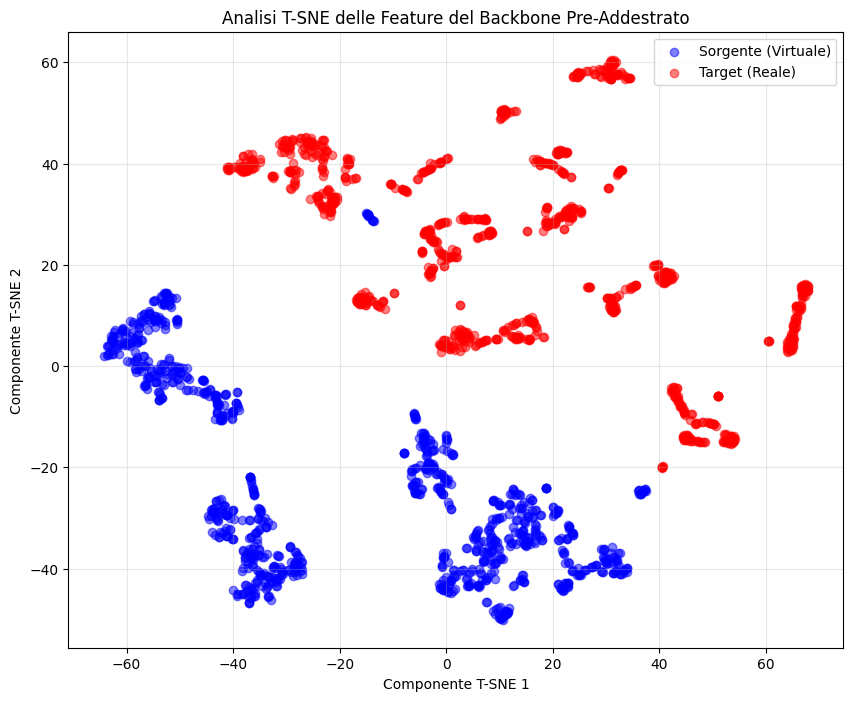

Analisi T-SNE completata. Controlla il plot 'tsne_domain_shift.png'.


In [ ]:
import torch
import tqdm
import torch.nn.functional as F
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms.functional as TF
from PIL import Image
import os
from glob import glob
from collections import OrderedDict

# Librerie di analisi e plot (Devono essere installate in Colab: !pip install scikit-learn matplotlib)
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm # FIX: Import tqdm function directly from tqdm.notebook

# --- 1. CLASSE DATASET SEMPLIFICATA PER L'ANALISI ---

class SimpleImageDataset(Dataset):
    """Dataset semplificato che carica solo le immagini per l'analisi delle feature."""
    def __init__(self, img_dir: str):
        self.img_paths = sorted(
            [p for p in glob(os.path.join(img_dir, "*")) if p.lower().endswith((".jpg", ".png", ".jpeg"))]
        )

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        img = Image.open(img_path).convert("RGB")

        # Le feature vengono estratte dal Backbone di Faster R-CNN, che si aspetta
        # il formato [C, H, W] in [0, 1].
        img_tensor = TF.to_tensor(img)
        return img_tensor, img_path # Restituiamo il percorso per il debug

# --- 2. FUNZIONE DI ESTRAZIONE FEATURE ---

def extract_features(model_backbone, data_loader, device):
    """Estrae le feature globali (pooling FPN) per tutte le immagini."""
    all_features = []

    # Metti il modello in modalità valutazione
    model_backbone.eval()

    with torch.no_grad():
        for images, paths in tqdm(data_loader, desc="Extracting Features"):
            images = [img.to(device) for img in images]

            # Forward pass solo attraverso il backbone
            features = model_backbone(images[0].unsqueeze(0)) # Passa un'immagine alla volta

            if isinstance(features, torch.Tensor):
                features = OrderedDict([("0", features)])

            # Global pooled features (concatena i feature di tutti i livelli FPN)
            pooled = [
                F.adaptive_avg_pool2d(f, 1).flatten(1)
                for f in features.values()
            ]
            im_feat = torch.cat(pooled, dim=1)

            all_features.append(im_feat.cpu().numpy())

    return np.concatenate(all_features, axis=0)

# --- 3. ESECUZIONE E VISUALIZZAZIONE PRINCIPALE ---

if __name__ == '__main__':
    # CONFIGURAZIONE (Adatta questi percorsi e parametri)
    BASE_DATA_PATH = '/content/data_extracted'
    REAL_IMG_DIR = os.path.join(BASE_DATA_PATH, 'real_LRDD/train/images') # Target
    VIRT_IMG_DIR = os.path.join(BASE_DATA_PATH, 'virtualonlymountains')  # Sorgente

    # Parametri
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    SAMPLE_SIZE = 1000 # Numero massimo di campioni da campionare per il plot T-SNE

    # --- 3.1. Preparazione del Backbone (Usiamo i pesi COCO) ---
    weights = FasterRCNN_ResNet50_FPN_Weights.COCO_V1
    base_model = fasterrcnn_resnet50_fpn(weights=weights)
    backbone = base_model.backbone.to(device)

    # --- 3.2. Caricamento Dati ---
    virtual_dataset = SimpleImageDataset(VIRT_IMG_DIR)
    real_dataset = SimpleImageDataset(REAL_IMG_DIR)

    # Veloce campionamento dei dati per T-SNE (riduce il tempo di esecuzione)
    if len(virtual_dataset) > SAMPLE_SIZE:
        virtual_indices = np.random.choice(len(virtual_dataset), SAMPLE_SIZE, replace=False)
        virtual_subset = torch.utils.data.Subset(virtual_dataset, virtual_indices)
    else:
        virtual_subset = virtual_dataset

    if len(real_dataset) > SAMPLE_SIZE:
        real_indices = np.random.choice(len(real_dataset), SAMPLE_SIZE, replace=False)
        real_subset = torch.utils.data.Subset(real_dataset, real_indices)
    else:
        real_subset = real_dataset

    virtual_loader = DataLoader(virtual_subset, batch_size=1, shuffle=False)
    real_loader = DataLoader(real_subset, batch_size=1, shuffle=False)

    # --- 3.3. Estrazione delle Feature ---
    print("Inizio estrazione feature Sorgente...")
    virt_features = extract_features(backbone, virtual_loader, device)

    print("Inizio estrazione feature Target...")
    real_features = extract_features(backbone, real_loader, device)

    # Combina feature e crea etichette di dominio (0=Virtual, 1=Reale)
    all_features = np.vstack([virt_features, real_features])
    domain_labels = np.array([0] * len(virt_features) + [1] * len(real_features))

    # --- 3.4. Riduzione della Dimensionalità con T-SNE ---
    print(f"Esecuzione T-SNE su {len(all_features)} campioni...")
    # T-SNE è computazionalmente costoso, si usa PCA per una riduzione iniziale
    # se la dimensione dei dati è troppo alta, ma in questo caso usiamo l'implementazione base.

    tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, learning_rate=200)
    tsne_results = tsne.fit_transform(all_features)

    # --- 3.5. Visualizzazione ---
    plt.figure(figsize=(10, 8))

    # Plot Dominio Sorgente (Virtuale)
    plt.scatter(
        tsne_results[domain_labels == 0, 0],
        tsne_results[domain_labels == 0, 1],
        label='Sorgente (Virtuale)',
        alpha=0.5,
        color='blue'
    )

    # Plot Dominio Target (Reale)
    plt.scatter(
        tsne_results[domain_labels == 1, 0],
        tsne_results[domain_labels == 1, 1],
        label='Target (Reale)',
        alpha=0.5,
        color='red'
    )

    plt.title("Analisi T-SNE delle Feature del Backbone Pre-Addestrato")
    plt.xlabel("Componente T-SNE 1")
    plt.ylabel("Componente T-SNE 2")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Salva e mostra il plot (Colab visualizza plt.show() automaticamente)
    plt.savefig('tsne_domain_shift.png')
    plt.show()
    print("Analisi T-SNE completata. Controlla il plot 'tsne_domain_shift.png'.")